In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from rdkit import Chem
from rdkit.Chem import Draw
%matplotlib inline

homedir = os.path.expanduser("~/")
homedir = homedir+"MSE299/silane/data/"
df = pd.read_csv(homedir+"fpData.csv", sep=',')

In [2]:
df = df.drop('Unnamed: 0', 1)

In [3]:
# Add unique alphanumeric identifier
df['id'] = range(1, len(df.index)+1)
df['id'] = 'molid' + df['id'].astype(str)
print(df.shape)
df.columns

(408, 8)


Index(['productCode', 'casNum', 'compound', 'smiles', 'flashPoint', 'img',
       'sds', 'id'],
      dtype='object')

In [4]:
# Remove extraneous SMILES entry
df = df.join(df['smiles'].str.split(' ', 1, expand=True).rename(columns={0:'pre_smiles', 1:'Extraneous_SMILES'}))


,productCode,casNum,compound,smiles,flashPoint,img,sds,id,pre_smiles
0,SIA0006.0,57757-66-1,(3-ACETAMIDOPROPYL)TRIMETHOXYSILANE,C(C)(=O)NCCC[Si](OC)(OC)OC,65,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0006.0_...,molid1,C(C)(=O)NCCC[Si](OC)(OC)OC
1,SIA0010.0,18306-45-1,ACETOXYETHYLDIMETHYLCHLOROSILANE,C(C)(=O)OCC[Si](Cl)(C)C,63,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0010.0_...,molid2,C(C)(=O)OCC[Si](Cl)(C)C
2,SIA0015.0,18163-34-3,ACETOXYETHYLMETHYLDICHLOROSILANE,C(C)(=O)OCC[Si](Cl)(Cl)C,65,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0015.0_...,molid3,C(C)(=O)OCC[Si](Cl)(Cl)C
3,SIA0020.0,18204-80-3,ACETOXYETHYLTRICHLOROSILANE,C(C)(=O)OCC[Si](Cl)(Cl)Cl,82,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0020.0_...,molid4,C(C)(=O)OCC[Si](Cl)(Cl)Cl
4,SIA0025.0,22538-45-0,ACETOXYETHYLTRIETHOXYSILANE,C(C)(=O)OCC[Si](OCC)(OCC)OCC,99,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0025.0_...,molid5,C(C)(=O)OCC[Si](OCC)(OCC)OCC
5,SIA0030.0,72878-29-6,ACETOXYETHYLTRIMETHOXYSILANE,C(C)(=O)OCC[Si](OC)(OC)OC,60,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0030.0_...,molid6,C(C)(=O)OCC[Si](OC)(OC)OC
6,SIA0035.0,1356113-09-1,ACETOXYETHYLTRIS(DIMETHYLAMINO)SILANE,C(C)(=O)OCC[Si](N(C)C)(N(C)C)N(C)C,40,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0035.0_...,molid7,C(C)(=O)OCC[Si](N(C)C)(N(C)C)N(C)C
7,SIA0038.0,14697-86-0,ACETOXYHEPTAMETHYLCYCLOTETRASILOXANE,C(C)(=O)O[Si]1(O[Si](O[Si](O[Si](O1)(C)C)(C)C)...,65,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0038.0_...,molid8,C(C)(=O)O[Si]1(O[Si](O[Si](O[Si](O1)(C)C)(C)C)...
8,SIA0050.0,5630-83-1,ACETOXYMETHYLTRIETHOXYSILANE,C(C)(=O)OC[Si](OCC)(OCC)OCC,60,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0050.0_...,molid9,C(C)(=O)OC[Si](OCC)(OCC)OCC
9,SIA0060.0,2917-65-9,ACETOXYMETHYLTRIMETHYLSILANE,C(C)(=O)OC[Si](C)(C)C,20,https://www.gelest.com:443/wp-content/uploads/...,https://s3.amazonaws.com/gelest/sds/SIA0060.0_...,molid10,C(C)(=O)OC[Si](C)(C)C


In [20]:
row = df.loc[df['id'] == 'molid183']
row.smiles


182    C(C)(C)(C)[Sn](Cl)(Cl)C(C)(C)C
Name: smiles, dtype: object

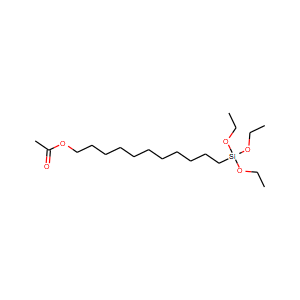

In [5]:
#print(row.smiles)
m1 = Chem.MolFromSmiles('C(C)(=O)OCCCCCCCCCCC[Si](OCC)(OCC)OCC')
Draw.MolToImage(m1)

# Check For Invalid Smiles

In [5]:
# Check for invalid SMILES
mol_list = [Chem.MolFromSmiles(x) for x in df['pre_smiles']]
invalid = len([x for x in mol_list if x is None])
print("No. of invalid entries: "+str(invalid))

No. of invalid entries: 1


In [132]:
mol_list = []
for x in df['pre_smiles']:
    if Chem.MolFromSmiles(x) == None:
        print(x)
        df = df[df.pre_smiles != x]
    else:
        mol_list.append(Chem.MolFromSmiles(x))

F[Si-2](F)(F)(F)(F)F.[NH4+].[NH4+]


# Deal With Duplicate Entries

In [133]:
mask = df.duplicated('smiles', keep=False)

In [134]:
#Separate out unique and duplicate entries
df_uni = df[~mask]
df_dup = df[mask]
print(df.shape, df_uni.shape, df_dup.shape)

(407, 9) (346, 9) (61, 9)


In [135]:
# Compute mean of duplicate entries
avg_df = df_dup.groupby('smiles', as_index=False).mean()
avg_df.head(25)

,smiles,flashPoint
0,C(C)O[Ge](OCC)(OCC)OCC,62.000000
1,C(C)O[Si](O[*:2])(OCC)[*:1],54.500000
2,C(C)[Si](O[*:2])(CC)[*:1],143.666667
3,C(C=C)(=O)OCCC[Si](OC)(OC)OC,122.000000
4,C(CCC)[Sn](CCCC)(CCCC)CCCC,107.000000
5,C1(=CC=CC=C1)C[SiH](O[*:2])[*:1],35.500000
6,C=CCCCCCCCCCCCCCCCC,154.000000
7,C[Si](O[*:2])(C)[*:1],241.787879
8,C[Sn](C)(C)C,12.000000
9,C[Sn](Cl)(C)C,55.500000


In [136]:
# Match up average predictions to SMILES and drop duplicate entries
print(df_dup.shape)
df_dup = df_dup.drop(['flashPoint'], axis=1)
df_dup = pd.merge(df_dup, avg_df, how="right", on=["smiles"])
print(df_dup.shape)
df_dup = df_dup.drop_duplicates(subset=['smiles'], keep="first")
print(df_dup.shape)

(61, 9)
(61, 9)
(13, 9)


In [137]:
# Add reliable averaged de-duplicated entries back to unique entries
df2 = pd.concat([df_dup, df_uni], axis=0)
print(df2.shape)
print(df2.smiles.unique().shape)
print(df.smiles.unique().shape)

(359, 9)
(359,)
(359,)


C:\Users\Nathaniel\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [138]:
# Reset index of df
df2 = df2.reset_index(drop=True)
df2.columns
#df2 = df2.drop('Unnamed: 0',1)
#df2 = df2.drop('Unnamed: 0_x',1)
#df2 = df2.drop('Unnamed: 0_y',1)
df2.head(5)

,casNum,compound,flashPoint,id,img,pre_smiles,productCode,sds,smiles
0,4369-14-6,(3-ACRYLOXYPROPYL)TRIMETHOXYSILANE,122.0,molid33,https://www.gelest.com:443/wp-content/uploads/...,C(C=C)(=O)OCCC[Si](OC)(OC)OC,SIA0200.0,https://s3.amazonaws.com/gelest/sds/SIA0200.0_...,C(C=C)(=O)OCCC[Si](OC)(OC)OC
1,1760-24-3,N-(2-AMINOETHYL)-3-AMINOPROPYLTRIMETHOXYSILANE,150.0,molid69,https://www.gelest.com:443/wp-content/uploads/...,NCCNCCC[Si](OC)(OC)OC,SIA0591.0,https://s3.amazonaws.com/gelest/sds/SIA0591.0_...,NCCNCCC[Si](OC)(OC)OC
2,13822-56-5,3-AMINOPROPYLTRIMETHOXYSILANE,83.0,molid88,https://www.gelest.com:443/wp-content/uploads/...,NCCC[Si](OC)(OC)OC,SIA0611.0,https://s3.amazonaws.com/gelest/sds/SIA0611.0_...,NCCC[Si](OC)(OC)OC
3,112-88-9,1-Octadecene,154.0,molid144,https://www.gelest.com:443/wp-content/uploads/...,C=CCCCCCCCCCCCCCCCC,ENEO3210,https://s3.amazonaws.com/gelest/sds/ENEO3210_G...,C=CCCCCCCCCCCCCCCCC
4,1461-25-2,TETRA-n-BUTYLTIN,107.0,molid228,https://www.gelest.com:443/wp-content/uploads/...,C(CCC)[Sn](CCCC)(CCCC)CCCC,SNT7260,https://s3.amazonaws.com/gelest/sds/SNT7260_GH...,C(CCC)[Sn](CCCC)(CCCC)CCCC


In [139]:
print(df2.shape)
df2.to_csv(homedir+"silanedata_all.csv", index=False)

(359, 9)


# Internal Set

In [140]:
df = pd.read_csv(homedir+"silanedata_all.csv")

In [141]:
#construct internal test set
size = 0.10
seed = 6
np.random.seed(seed)

In [142]:
msk = np.random.rand(len(df)) < 0.1
df_tv = df[~msk]
df_int = df[msk]
print(df.shape, df_tv.shape, df_int.shape)

(359, 9) (323, 9) (36, 9)


In [143]:
df_tv.to_csv(homedir+'silaneData_all_trainval.csv', index=False)
df_int.to_csv(homedir+'silaneData_all_int.csv', index=False)

# split data by task

In [144]:
# currently one measurement, flash point
# Check for missing labels
dfInt = pd.read_csv(homedir+"silaneData_all_int.csv")
dfInt['flashPoint'].isnull().sum()
df.shape


(359, 9)

In [145]:
#drop data if this is anything greater than 1
df1Int = dfInt[['id','compound','smiles','flashPoint']]
df1Int = df1Int.dropna(axis=0, how='any')
print("Missing data:" +str(df1Int['flashPoint'].isnull().sum()))
df1Int.to_csv(homedir+"silaneData_int_flashPoint.csv", index=False)
df1Int.groupby('flashPoint').count()
df1Int.shape

Missing data:0


(36, 4)

In [146]:
dfTrainval = pd.read_csv(homedir+"silaneData_all_trainval.csv")
dfTrainval = dfTrainval[['id','compound','smiles','flashPoint']]
dfTrainval = dfTrainval.dropna(axis=0, how='any')
print("Missing data:" +str(df1Int['flashPoint'].isnull().sum()))
dfTrainval.to_csv(homedir+"silaneData_tv_flashPoint.csv", index=False)
dfTrainval.groupby('flashPoint').count()
dfTrainval.shape

Missing data:0


(323, 4)

# Prep 2D images

In [147]:
homedir = os.path.expanduser("~/")
archdir = homedir+"MSE299/archive/"
homedir = homedir+"MSE299/silane/data/"

In [148]:
from chem_scripts import cs_compute_features, cs_set_resolution, cs_coords_to_grid, cs_check_grid_boundary
from chem_scripts import cs_channel_mapping, cs_map_atom_to_grid, cs_map_bond_to_grid, cs_grid_to_image

In [149]:
def gen_image():
    
    exclusion_list = []
    full_array_list = []

    for i in range(0,df.shape[0]):

        # Extract SMILES string
        smiles_string = df["smiles"][i]
        #print(i, smiles_string)

        # Extract ID of molecule
        id_string = df["id"][i]

        # Read SMILES string
        mol = Chem.MolFromSmiles(smiles_string)
        
        # Compute properties
        print(smiles_string)
        mol, df_atom, df_bond, nancheckflag = cs_compute_features(mol)
        
        # Intialize grid
        myarray = cs_set_resolution(gridsize, representation=rep)

        # Map coordinates to grid
        df_atom, atomcheckflag = cs_coords_to_grid(df_atom, dim, res)
        
        # Check if outside grid
        sizecheckflag = cs_check_grid_boundary(df_atom, gridsize)

        if sizecheckflag == True or atomcheckflag == True or nancheckflag == True:

            exclusion_list.append(id_string)
            print("EXCLUSION for "+str(id_string))
            #print('exlusion')

        else:
            # Initialize channels
            channel = cs_channel_mapping()

            # Map atom to grid
            myarray = cs_map_atom_to_grid(myarray, channel, df_atom, representation=rep)

            # Map bond to grid
            myarray = cs_map_bond_to_grid(myarray, channel, df_atom, df_bond, representation=rep)

            # Visualize status every 1000 steps
            #if (i+1)%nskip==0:
               # print("*** PROCESSING "+str(i+1)+": "+str(id_string)+" "+str(smiles_string))
               # cs_grid_to_image(myarray, mol)

            # Generate combined array of raw input
            curr_array = myarray.flatten()
            curr_array_list = curr_array.tolist()
            full_array_list.append(curr_array_list)

    full_array = np.asarray(full_array_list)
    print(full_array.shape)
    print(exclusion_list)

    return(full_array, exclusion_list)

In [150]:
dim = 40       # Size of the box in Angstroms, not radius!
res = 0.5      # Resolution of each pixel
rep = "engA"    # Image representation used
nskip = 500    # How many steps till next visualization

gridsize = int(dim/res)

In [77]:
# Specify dataset name
jobname = "silaneData_int"
taskname = ["flashPoint"]

for task in taskname:

    print("PROCESSING TASK: "+str(jobname)+" "+str(task))
    
    # Specify input and output csv
    filein  = homedir+jobname+"_"+task+".csv"
    print(filein)
    fileout = homedir+jobname+"_"+task+"_image.csv"
    print(fileout)
    # Specify out npy files
    fileimage = archdir+jobname+"_"+task+"_img_"+rep+".npy" 
    print(fileimage)
    filelabel = archdir+jobname+"_"+task+"_img_label.npy" 
    print(filelabel)
    # Generate image
    df = pd.read_csv(filein)
    print(df.columns)
    full_array, exclusion_list = gen_image()
    
    # Dataset statistics before and after image generation
    print("*** Database Specs:")
    print(df.shape[0], len(exclusion_list), int(df.shape[0])-int(len(exclusion_list)))
    
    # Create csv of final data (after exclusion)
    print("*** Separating Database:")
    mod_df = df[~df["id"].isin(exclusion_list)]
    mod_df.to_csv(fileout, index=False)

    # Save generated images as npy
    np.save(fileimage, full_array)
    print(full_array.shape)
    
    # Save labels as npy
    label_array = mod_df[task].as_matrix().astype("float32")
    np.save(filelabel, label_array)
    print(label_array.shape)

PROCESSING TASK: silaneData_int flashPoint
C:\Users\Nathaniel/MSE299/silane/data/silaneData_int_flashPoint.csv
C:\Users\Nathaniel/MSE299/silane/data/silaneData_int_flashPoint_image.csv
C:\Users\Nathaniel/MSE299/archive/silaneData_int_flashPoint_img_engA.npy
C:\Users\Nathaniel/MSE299/archive/silaneData_int_flashPoint_img_label.npy
Index(['id', 'compound', 'smiles', 'flashPoint'], dtype='object')
EXCLUSION for molid167
EXCLUSION for molid179
EXCLUSION for molid182
EXCLUSION for molid183
EXCLUSION for molid192
EXCLUSION for molid205
EXCLUSION for molid209
EXCLUSION for molid212
EXCLUSION for molid272
EXCLUSION for molid285
EXCLUSION for molid290
EXCLUSION for molid305
EXCLUSION for molid306
EXCLUSION for molid336
EXCLUSION for molid337
EXCLUSION for molid359
(20, 25600)
['molid167', 'molid179', 'molid182', 'molid183', 'molid192', 'molid205', 'molid209', 'molid212', 'molid272', 'molid285', 'molid290', 'molid305', 'molid306', 'molid336', 'molid337', 'molid359']
*** Database Specs:
36 16 20


C:\Users\Nathaniel\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [151]:
# Specify dataset name
jobname = "silaneData_tv"
taskname = ["flashPoint"]

for task in taskname:

    print("PROCESSING TASK: "+str(jobname)+" "+str(task))
    
    # Specify input and output csv
    filein  = homedir+jobname+"_"+task+".csv"
    fileout = homedir+jobname+"_"+task+"_image.csv"
    
    # Specify out npy files
    fileimage = archdir+jobname+"_"+task+"_img_"+rep+".npy" 
    filelabel = archdir+jobname+"_"+task+"_img_label.npy" 
    
    # Generate image
    df = pd.read_csv(filein)
    full_array, exclusion_list = gen_image()
    
    # Dataset statistics before and after image generation
    print("*** Database Specs:")
    print(df.shape[0], len(exclusion_list), int(df.shape[0])-int(len(exclusion_list)))
    
    # Create csv of final data (after exclusion)
    print("*** Separating Database:")
    mod_df = df[~df["id"].isin(exclusion_list)]
    mod_df.to_csv(fileout, index=False)

    # Save generated images as npy
    np.save(fileimage, full_array)
    print(full_array.shape)
    
    # Save labels as npy
    label_array = mod_df[task].as_matrix().astype("float32")
    np.save(filelabel, label_array)
    print(label_array.shape)

PROCESSING TASK: silaneData_tv flashPoint
C(C=C)(=O)OCCC[Si](OC)(OC)OC
NCCNCCC[Si](OC)(OC)OC
NCCC[Si](OC)(OC)OC
C(CCC)[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid228
C[Sn](C)(C)C
EXCLUSION for molid235
[Sn](=O)=O
EXCLUSION for molid252
C[Sn](Cl)(C)C
EXCLUSION for molid268
C(C)O[Ge](OCC)(OCC)OCC
EXCLUSION for molid330
C(C)[Si](O[*:2])(CC)[*:1]
EXCLUSION for molid361
C[Si](O[*:2])(C)[*:1]
EXCLUSION for molid367
C1(=CC=CC=C1)C[SiH](O[*:2])[*:1]
EXCLUSION for molid401
C(C)O[Si](O[*:2])(OCC)[*:1]
EXCLUSION for molid403
C(C)(=O)NCCC[Si](OC)(OC)OC
C(C)(=O)OCC[Si](Cl)(C)C
C(C)(=O)OCC[Si](Cl)(Cl)C
C(C)(=O)OCC[Si](Cl)(Cl)Cl
C(C)(=O)OCC[Si](OCC)(OCC)OCC
C(C)(=O)OCC[Si](OC)(OC)OC
C(C)(=O)OCC[Si](N(C)C)(N(C)C)N(C)C
C(C)(=O)OC[Si](OCC)(OCC)OCC
C(C)(=O)OC[Si](C)(C)C
C(C)(=O)OC1=CC=C(CC[Si](Cl)(Cl)Cl)C=C1
C(C)(=O)OCCC[Si](O[Si](C)(C)C)(O[Si](C)(C)C)C
C(C)(=O)OCCC[Si](Cl)(Cl)C
C(C)(=O)OCCC[Si](OC)(OC)OC
C(C)(=O)O[Si](C)(C)C
C(C)(=O)OCCCCCCCCCCC[Si](OCC)(OCC)OCC
C(C)(=O)NCC(=O)NCCC[Si](OC)(OC)OC
C(C)(=O)N1[

EXCLUSION for molid201
C(CCCCCCC)[Sn](Cl)(Cl)CCCCCCCC
EXCLUSION for molid202
C(CCCCCCC)[Sn](CCCCCCCCCCCC)(CCCCCCCCCCCC)CCCCCCCC
EXCLUSION for molid203
C(CCCCCCC)[Sn](CCCCCCCC)=O
EXCLUSION for molid204
C1(=CC=CC=C1)[Sn](Cl)(Cl)C1=CC=CC=C1
EXCLUSION for molid205
C(CC)[Sn](Cl)(Cl)CCC
EXCLUSION for molid207
C(=C)[Sn](CCCC)(CCCC)C=C
EXCLUSION for molid208
C(=C)[Sn](Cl)(Cl)C=C
EXCLUSION for molid209
C(#C)[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid211
C(C)[Sn](C)(C)C
EXCLUSION for molid212
C(C(=C)C)(=O)O[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid214
C[Sn](Cl)(Cl)Cl
EXCLUSION for molid215
C(CCCCCCC)[Sn](Cl)(Cl)Cl
EXCLUSION for molid216
C1(=CC=CC=C1)C#C[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid217
C1(=CC=CC=C1)[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid218
C1(=CC=CC=C1)S[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid219
C1(=CC=CC=C1)[Sn](Cl)(Cl)Cl
EXCLUSION for molid220
C(#CC)[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid221
N1=C(C=CC=C1)[Sn](CCCC)(CCCC)CCCC
EXCLUSION for molid222
[O-]CC.[Sn+4].[Na+].[O-]CC.[O-]CC.[O-

EXCLUSION for molid292
C(CCC)[Ge](Cl)(Cl)Cl
EXCLUSION for molid293
C(=O)(O)CC[Ge](Cl)(Cl)Cl
EXCLUSION for molid294
ClC[Ge](C)(C)C
EXCLUSION for molid295
C(CCC)[Ge](OC(C)=O)(OC(C)=O)CCCC
EXCLUSION for molid296
C(CCC)[Ge](Cl)(Cl)CCCC
EXCLUSION for molid297
ClC(Cl)[Ge](C)(C)C
EXCLUSION for molid298
C(C)[Ge](Cl)(Cl)CC
EXCLUSION for molid299
C(C)[Ge](OCC)(OCC)CC
EXCLUSION for molid300
C(C)[GeH2]CC
EXCLUSION for molid301
CN(C)[Ge](C)(C)C
EXCLUSION for molid302
C[Ge](Cl)(Cl)C
EXCLUSION for molid303
C1(=CC=CC=C1)[Ge](Cl)(Cl)C1=CC=CC=C1
EXCLUSION for molid304
C1(=CC=CC=C1)[Ge](C)(C)C1=CC=CC=C1
EXCLUSION for molid305
C(C)[Ge](OCC)(OCC)OCC
EXCLUSION for molid308
[GeH4]
EXCLUSION for molid309
[Ge]
[Ge](I)I
EXCLUSION for molid311
[Ge](=O)=O
EXCLUSION for molid312
[Ge](=[Se])=[Se]
EXCLUSION for molid313
[Ge]=S
EXCLUSION for molid314
[Ge](I)(I)(I)I
EXCLUSION for molid315
C(C)[Ge]([Ge](CC)(CC)CC)(CC)CC
EXCLUSION for molid316
C(C)[Ge](O[Ge](CC)(CC)CC)(CC)CC
EXCLUSION for molid317
C[Ge]([Ge](C)(C)C)(C)C

*** Database Specs:
323 177 146
*** Separating Database:
(146, 25600)
(146,)


C:\Users\Nathaniel\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [83]:
m = Chem.MolFromSmiles('F[Si-2](F)(F)(F)(F)F.[NH4+].[NH4+]')
Draw.MolToImage(m)

ValueError: Null molecule provided